# IDVE Assignment 2
## NBA 2022-23 Season Statistics Analysis

**Student Name:** [Your Name]
**Student ID:** [Your ID]
**Date:** [Date]


## Setup and Imports

Import all necessary libraries for data analysis and visualization.

In [1]:
# Data manipulation and analysis
import time
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from minisom import MiniSom
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import joblib

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## 1. Data Loading and Initial Exploration

Load the NBA 2022-23 statistics dataset and perform initial exploration.

In [2]:
# Load the dataset
df = pd.read_csv('nba_2022-23_stats.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of players: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Dataset shape: (467, 52)
Number of players: 467
Number of features: 52


In [3]:
# Display first few rows
df.head(10)

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,1941,24.1,0.656,0.564,0.248,2.3,16.8,9.7,30.0,1.3,0.9,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,755,13.6,0.498,0.322,0.334,2.1,11.4,6.8,35.3,1.8,1.4,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,2126,16.1,0.513,0.289,0.317,4.7,16.5,10.8,38.6,1.7,1.3,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,1954,23.9,0.583,0.309,0.268,3.7,20.8,12.5,33.5,1.2,1.4,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,1672,25.9,0.677,0.267,0.387,1.2,19.5,10.5,24.5,1.0,3.4,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
5,5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,17.6,0.506,1.s6,4.4,0.365,7.3,13.2,0.552,0.551,3.8,4.6,0.842,0.8,3.1,3.9,5.4,0.9,0.7,2.9,2.1,23.2,1673,19.7,0.593,0.249,0.260,2.8,9.9,6.5,26.6,1.3,1.7,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6
6,6,Kawhi Leonard,42492492,SF,31,LAC,52,50,33.6,8.6,16.8,0.512,2.0,4.8,0.416,6.6,11.9,0.551,0.572,4.7,5.4,0.871,1.1,5.4,6.5,3.9,1.4,0.5,1.7,1.6,23.8,1748,23.9,0.623,0.287,0.320,3.7,17.8,10.8,19.6,2.0,1.4,8.1,27.0,4.9,2.2,7.1,0.194,5.1,0.9,6.1,3.5
7,7,Paul George,42492492,SF,32,LAC,56,56,34.6,8.2,17.9,0.457,2.8,7.6,0.371,5.4,10.3,0.521,0.536,4.6,5.3,0.871,0.8,5.3,6.1,5.1,1.5,0.4,3.1,2.8,23.8,1939,19.6,0.588,0.424,0.293,2.6,17.0,9.9,24.2,2.1,0.9,13.4,29.5,2.3,2.3,4.6,0.114,2.4,0.3,2.8,2.3
8,8,Giannis Antetokounmpo,42492492,PF,28,MIL,63,63,32.1,11.2,20.3,0.553,0.7,2.7,0.275,10.5,17.6,0.596,0.572,7.9,12.3,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,2024,29.0,0.605,0.134,0.604,7.3,30.0,19.1,33.2,1.2,2.1,13.2,38.8,4.9,3.7,8.6,0.204,5.8,2.7,8.5,5.4
9,9,Damian Lillard,42492492,PG,32,POR,58,58,36.3,9.6,20.7,0.463,4.2,11.3,0.371,5.4,9.4,0.574,0.564,8.8,9.6,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,2107,26.7,0.645,0.547,0.464,2.4,12.8,7.6,35.0,1.2,0.8,11.7,33.8,8.2,0.8,9.0,0.205,8.3,-1.2,7.1,4.9


In [4]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     467 non-null    int64  
 1   Player Name    467 non-null    object 
 2   Salary         467 non-null    int64  
 3   Position       467 non-null    object 
 4   Age            467 non-null    int64  
 5   Team           467 non-null    object 
 6   GP             467 non-null    int64  
 7   GS             467 non-null    int64  
 8   MP             467 non-null    float64
 9   FG             467 non-null    float64
 10  FGA            467 non-null    float64
 11  FG%            466 non-null    float64
 12  3P             467 non-null    object 
 13  3PA            467 non-null    float64
 14  3P%            454 non-null    float64
 15  2P             467 non-null    float64
 16  2PA            467 non-null    float64
 17  2P%            463 non-null    float64
 18  eFG%      

In [5]:
# Display statistical summary
df.describe()

,Unnamed: 0,Salary,Age,GP,GS,MP,FG,FGA,FG%,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Total Minutes,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,467.000000,4.670000e+02,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,467.000000,454.000000,467.000000,467.000000,463.000000,466.000000,467.000000,467.000000,444.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,466.000000,466.000000,466.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,233.000000,8.416599e+06,25.820128,48.233405,22.650964,19.871306,3.351392,7.117773,0.465009,2.792719,0.325090,2.356531,4.325268,0.533464,0.534266,1.435546,1.848394,0.753489,0.866809,2.662099,3.528051,2.107709,0.610493,0.379015,1.114133,1.702784,9.129979,1109.676660,13.279657,0.563024,0.403655,0.249749,5.243469,14.884582,10.061456,13.563812,1.523555,1.832120,12.735974,18.425910,1.208351,1.120557,2.328908,0.081771,-1.344968,-0.087152,-1.432548,0.539829
std,134.955548,1.070812e+07,4.275113,24.807740,27.094577,9.548684,2.457836,5.020700,0.109547,2.260794,0.131624,1.989397,3.571280,0.136046,0.104584,1.568500,1.896352,0.148659,0.746976,1.707984,2.277160,1.957517,0.399083,0.364387,0.830051,0.776957,6.906006,827.367432,6.230049,0.100741,0.219066,0.186855,4.332254,6.478093,4.671516,8.630677,1.368860,2.524336,7.198533,5.909528,1.765160,0.980478,2.533094,0.088089,3.578193,2.243437,4.925175,1.172960
min,0.000000,5.849000e+03,19.000000,1.000000,0.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-20.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,-1.900000,0.000000,-1.600000,-0.517000,-22.500000,-10.400000,-26.500000,-1.300000
25%,116.500000,1.782621e+06,23.000000,31.000000,1.000000,12.500000,1.600000,3.300000,0.417000,1.000000,0.288000,0.900000,1.800000,0.487000,0.493750,0.500000,0.600000,0.691000,0.400000,1.400000,1.900000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000,341.000000,10.100000,0.524000,0.268250,0.143250,2.100000,10.700000,6.750000,7.450000,1.000000,0.700000,9.500000,14.300000,0.000000,0.300000,0.300000,0.047000,-2.900000,-0.900000,-3.300000,-0.100000
50%,233.000000,3.722040e+06,25.000000,55.000000,8.000000,19.200000,2.700000,5.800000,0.455000,2.400000,0.344500,1.700000,3.200000,0.537000,0.537500,0.900000,1.200000,0.769000,0.700000,2.300000,3.000000,1.400000,0.600000,0.300000,0.900000,1.700000,7.100000,990.000000,13.000000,0.567000,0.409000,0.226000,3.800000,13.500000,9.000000,11.200000,1.400000,1.200000,11.900000,17.600000,0.600000,0.900000,1.500000,0.087000,-1.300000,-0.100000,-1.300000,0.100000
75%,349.500000,1.063354e+07,29.000000,68.500000,45.500000,28.300000,4.300000,9.400000,0.507500,4.150000,0.387000,3.300000,5.850000,0.594500,0.578000,1.850000,2.350000,0.844000,1.100000,3.500000,4.500000,2.900000,0.800000,0.500000,1.500000,2.200000,11.700000,1842.000000,16.350000,0.610000,0.545750,0.323750,7.100000,18.350000,12.500000,18.000000,1.700000,2.350000,15.000000,21.150000,1.800000,1.800000,3.550000,0.129500,0.450000,0.800000,0.600000,0.800000
max,466.000000,4.807001e+07,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,11.400000,1.000000,10.500000,17.800000,1.000000,1.000000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,2.500000,4.100000,5.000000,33.100000,2963.000000,65.600000,1.064000,1.000000,2.000000,28.800000,55.400000,29.600000,47.600000,24.200000,44.100000,100.000000,52.500000,9.600000,4.800000,12.600000,0.626000,17.000000,32.700000,48.600000,6.400000


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
FG%      1
3P%     13
2P%      4
eFG%     1
FT%     23
TS%      1
3PAr     1
FTr      1
dtype: int64


In [7]:
# Display column names for reference
print("Available columns:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Available columns:
 1. Unnamed: 0
 2. Player Name
 3. Salary
 4. Position
 5. Age
 6. Team
 7. GP
 8. GS
 9. MP
10. FG
11. FGA
12. FG%
13. 3P
14. 3PA
15. 3P%
16. 2P
17. 2PA
18. 2P%
19. eFG%
20. FT
21. FTA
22. FT%
23. ORB
24. DRB
25. TRB
26. AST
27. STL
28. BLK
29. TOV
30. PF
31. PTS
32. Total Minutes
33. PER
34. TS%
35. 3PAr
36. FTr
37. ORB%
38. DRB%
39. TRB%
40. AST%
41. STL%
42. BLK%
43. TOV%
44. USG%
45. OWS
46. DWS
47. WS
48. WS/48
49. OBPM
50. DBPM
51. BPM
52. VORP


## 2. Data Cleaning and Preprocessing

Handle missing values, data types, and prepare data for analysis.

This section documents all data cleaning operations performed on the NBA 2022-23 statistics dataset to ensure data quality and prepare it for analysis.

### Cleaning Steps Performed

#### 1. **Removed Redundant Index Column**
**Column:** `Unnamed: 0`

**Reason:** This column was an auto-generated index from the CSV file that duplicates the DataFrame's built-in index, providing no analytical value.

#### 2. **Fixed Data Type Issues in `3P` Column**
**Column:** `3P` (3-Point Field Goals Made)

**Problem:** The column contained string values with 's' suffix (e.g., '1.s6' instead of '1.6'), preventing numeric operations.

**Solution:** Removed 's' characters and converted to numeric type.

**Example:**
```
Before: '1.s6' (string)
After:  1.6 (float)
for Bradley Beal
```
#### 3. **Handled Missing Percentage Values by Filling with Zero**

#### TODO: Leave no attempts as NaN
**Columns:** `3P%`, `FT%`, `2P%`, `FG%`, `eFG%`, `TS%`, `3PAr`, `FTr`

**Problem:** Missing values in shooting percentage columns (23 missing in `FT%`, 13 in `3P%`, etc.)

**Solution:** Replaced all `NaN` values with `0`.

**Reasoning:**
- **For shooting percentages** (`3P%`, `FT%`, `2P%`, `FG%`): Missing values typically occur when a player had zero attempts. A 0% shooting percentage is mathematically correct when attempts = 0 (you can't make shots you don't take).
  
- **For efficiency metrics** (`eFG%`, `TS%`): These are calculated metrics. A value of 0 indicates no offensive production rather than "unknown," which is appropriate for players with minimal playing time.

- **For ratio metrics** (`3PAr`, `FTr`): These represent the rate of 3-point attempts or free throw attempts relative to field goal attempts. Zero indicates the player didn't utilize that aspect of offense.

**Example:**
```python
# Player with no 3-point attempts
Player: Steven Adams
3PA: 0.0 → 3P%: NaN → After cleaning: 0.0
Interpretation: Didn't attempt 3-pointers, so 0% is accurate

# Player with attempts but missing data (rare)
Player: Example Player
3PA: 5.2 → 3P%: NaN → After cleaning: 0.0
Interpretation: Potentially misleading - might need investigation
```

**Limitation:** This approach assumes missing percentages indicate zero attempts. If data is missing due to recording errors for players who did attempt shots, this could create inaccuracies.

#### 4. **Ensured Proper Data Types for All Numeric Columns**
**Columns:** All columns except `Player Name`, `Position`, `Team`

**Problem:** Some numeric columns were stored as objects (strings) instead of numeric types.

**Solution:** Converted all non-categorical columns to numeric types, with error handling for invalid values.

**Reason:** Numeric operations (mean, correlation, visualization) require proper numeric data types. String values would cause errors or be excluded from calculations.

**Example:**
```
Before: '34.7' (object/string)
After:  34.7 (float64)
```



In [8]:
# 1. Remove index column
df = df.drop('Unnamed: 0', axis=1)

# 2. Fix data type issues
df['3P'] = pd.to_numeric(df['3P'].astype(str).str.replace('s', ''), errors='coerce')

# 3. Handle missing percentage values
percentage_cols = ['3P%', 'FT%', '2P%', 'FG%', 'eFG%', 'TS%', '3PAr', 'FTr']
for col in percentage_cols:
    df[col] = df[col].fillna(0)

# 4. Ensure numeric columns are proper type
numeric_cols = df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    if col not in ['Player Name', 'Position', 'Team']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 5. Check final data quality
print("Missing values after cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after cleaning:
Series([], dtype: int64)


In [9]:
# Check for players with very low playing time
print("=" * 60)
print("PLAYING TIME ANALYSIS")
print("=" * 60)
print(f"\nPlayers with < 100 total minutes: {(df['Total Minutes'] < 100).sum()}")
print(f"Players with < 10 games played: {(df['GP'] < 10).sum()}")
print(f"Players with < 5 MPG: {(df['MP'] < 5).sum()}")

# Show distribution of extreme values
print("\n" + "=" * 60)
print("EXTREME VALUES CHECK")
print("=" * 60)
print("\nPlayers with 100% shooting percentages (small samples):")
perfect_shooters = df[(df['FG%'] == 1.0) | (df['FT%'] == 1.0) | (df['3P%'] == 1.0)]
print(perfect_shooters[['Player Name', 'GP', 'Total Minutes', 'FG%', 'FT%', '3P%']].head(10))

print("\nPlayers with negative PER:")
print(df[df['PER'] < 0][['Player Name', 'GP', 'Total Minutes', 'PER']].head(10))

PLAYING TIME ANALYSIS

Players with < 100 total minutes: 64
Players with < 10 games played: 62
Players with < 5 MPG: 21

EXTREME VALUES CHECK

Players with 100% shooting percentages (small samples):
         Player Name  GP  Total Minutes    FG%    FT%    3P%
105      Danny Green  11            138  0.449  1.000  0.432
114   DeAndre Jordan  39            586  0.765  0.458  1.000
258  Markieff Morris  35            355  0.409  1.000  0.394
292      Bryn Forbes  25            268  0.361  1.000  0.304
312     Tony Bradley  12             33  0.500  1.000  0.600
349    Nick Richards  65           1217  0.629  0.749  1.000
362      Isaiah Todd   6             61  0.158  1.000  0.100
381      Noah Vonleh  23            171  0.458  1.000  0.250
383      Sam Merrill   5             59  0.409  1.000  0.278
384    Tyrese Martin  16             66  0.391  1.000  0.143

Players with negative PER:
          Player Name  GP  Total Minutes   PER
254      Joe Wieskamp   9             50  -0.4
356   Le

## TODO: Test autoencoder with the filtered players included

In [10]:
# Additional Cleaning - Minimal filtering approach
print("=" * 60)
print("FILTERING ANALYSIS")
print("=" * 60)

# Define minimal thresholds
MIN_GAMES = 5
MIN_TOTAL_MINUTES = 25

# Show what filtering will do
print(f"\nOriginal dataset: {len(df)} players")
print(f"Filter criteria: GP >= {MIN_GAMES} AND Total Minutes >= {MIN_TOTAL_MINUTES}")

# Apply filter
df_filtered = df[(df['GP'] >= MIN_GAMES) & (df['Total Minutes'] >= MIN_TOTAL_MINUTES)].copy()

removed_count = len(df) - len(df_filtered)
print(f"\n✅ Filtered dataset: {len(df_filtered)} players")
print(f"❌ Removed: {removed_count} players ({removed_count/len(df)*100:.1f}%)")

# Show who was removed (for transparency)
if removed_count > 0:
    removed_players = df[~df.index.isin(df_filtered.index)]
    print(f"\nExamples of removed players (very limited playing time):")
    print(removed_players[['Player Name', 'Team', 'GP', 'Total Minutes', 'MP', 'PTS']].head(10))

FILTERING ANALYSIS

Original dataset: 467 players
Filter criteria: GP >= 5 AND Total Minutes >= 25

✅ Filtered dataset: 436 players
❌ Removed: 31 players (6.6%)

Examples of removed players (very limited playing time):
                 Player Name Team  GP  Total Minutes    MP  PTS
221            Dylan Windler  CLE   3             10   3.3  1.7
247           Sterling Brown  LAL   4             24   6.0  0.0
365          Marko Simonovic  CHI   7             20   2.9  0.9
401  Michael Carter-Williams  ORL   4             44  11.0  4.3
403             Trevor Keels  NYK   3              8   2.7  1.0
404           Dereon Seabron  NOP   5             12   2.4  0.8
406        Mfiondu Kabengele  BOS   4             36   9.0  1.5
408             Malcolm Hill  CHI   5              9   1.8  1.0
413              Darius Days  HOU   4             25   6.3  3.8
428             Chima Moneke  SAC   2              8   4.0  1.0


#### Data Quality Verification

After cleaning, the dataset has:
- ✅ **Zero missing values** in all columns
- ✅ **Proper data types** (numeric columns as float64/int64, categorical as object)
- ✅ **467 players** with complete statistical records
- ✅ **51 features** ready for analysis

### TODO: try -> Feature Engineering and Preprocessing for Machine Learning

Prepare the dataset for modeling by removing identifiers, applying transformations, splitting data, and scaling features.

In [11]:
# ================================================================================
# PREPROCESSING FOR MACHINE LEARNING
# ================================================================================

# Configuration
RANDOM_SEED = 42
LOG_TRANSFORM_COLS = ['Salary']  # Columns to apply log transformation
TEST_SIZE = 0.15
VAL_SIZE = 0.15

print("=" * 80)
print("PREPROCESSING CONFIGURATION")
print("=" * 80)
print(f"Random Seed:            {RANDOM_SEED}")
print(f"Log Transform Columns:  {LOG_TRANSFORM_COLS}")
print(f"Test Split:             {TEST_SIZE * 100}%")
print(f"Validation Split:       {VAL_SIZE * 100}%")
print(f"Training Split:         {(1 - TEST_SIZE - VAL_SIZE * (1 - TEST_SIZE)) * 100:.1f}%")

# Step 1: Remove identifier columns (not needed for modeling)
print("\n" + "=" * 80)
print("STEP 1: REMOVE IDENTIFIER COLUMNS")
print("=" * 80)

df_model = df_filtered.copy()
identifier_cols = ['Player Name', 'Team', 'Position']
drop_cols = [c for c in identifier_cols if c in df_model.columns]

if drop_cols:
    print(f"Dropping columns: {drop_cols}")
    df_model = df_model.drop(columns=drop_cols)
    print(f"✅ Removed {len(drop_cols)} identifier columns")
else:
    print("⚠️ No identifier columns found to remove")

# Step 2: Keep only numeric columns
print("\n" + "=" * 80)
print("STEP 2: SELECT NUMERIC FEATURES")
print("=" * 80)

numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
X = df_model[numeric_cols].copy()

print(f"Selected {len(numeric_cols)} numeric features:")
print(f"Features: {', '.join(numeric_cols[:10])}...")
print(f"Shape: {X.shape}")

# Step 3: Apply log transformation (for skewed features like Salary)
print("\n" + "=" * 80)
print("STEP 3: APPLY LOG TRANSFORMATION")
print("=" * 80)

for col in LOG_TRANSFORM_COLS:
    if col in X.columns:
        original_mean = X[col].mean()
        X[col] = np.log1p(X[col].clip(lower=0))
        transformed_mean = X[col].mean()
        print(f"✅ Log-transformed '{col}':")
        print(f"   Original mean: {original_mean:,.2f}")
        print(f"   Transformed mean: {transformed_mean:.4f}")
    else:
        print(f"⚠️ Column '{col}' not found, skipping")

# Step 4: Train/Validation/Test Split
print("\n" + "=" * 80)
print("STEP 4: TRAIN/VALIDATION/TEST SPLIT")
print("=" * 80)

np.random.seed(RANDOM_SEED)

# First split: separate test set
X_train_full, X_test = train_test_split(
    X, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_SEED, 
    shuffle=True
)

# Second split: separate validation from training
val_relative = VAL_SIZE / (1.0 - TEST_SIZE)
X_train, X_val = train_test_split(
    X_train_full, 
    test_size=val_relative, 
    random_state=RANDOM_SEED, 
    shuffle=True
)

print(f"Train set:      {X_train.shape[0]:4d} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:4d} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]:4d} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Total:          {len(X):4d} samples")
print(f"\n✅ Data split completed with random seed {RANDOM_SEED}")

# Step 5: Feature Scaling (Standardization)
print("\n" + "=" * 80)
print("STEP 5: FEATURE SCALING (STANDARDIZATION)")
print("=" * 80)

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("StandardScaler fitted on training data")
print(f"Mean values (first 5 features): {scaler.mean_[:5]}")
print(f"Std values (first 5 features):  {scaler.scale_[:5]}")
print(f"\n✅ All splits scaled to mean=0, std=1")

# Save scaler for later use
joblib.dump(scaler, 'scaler.joblib')
print(f"\n💾 Scaler saved to 'scaler.joblib'")

# Summary
print("\n" + "=" * 80)
print("PREPROCESSING COMPLETE")
print("=" * 80)
print(f"✅ {len(numeric_cols)} numeric features prepared")
print(f"✅ {len(LOG_TRANSFORM_COLS)} features log-transformed")
print(f"✅ Data split into train/val/test sets")
print(f"✅ Features standardized (mean=0, std=1)")
print(f"\nData is ready for machine learning models!")
print("=" * 80)

PREPROCESSING CONFIGURATION
Random Seed:            42
Log Transform Columns:  ['Salary']
Test Split:             15.0%
Validation Split:       15.0%
Training Split:         72.2%

STEP 1: REMOVE IDENTIFIER COLUMNS
Dropping columns: ['Player Name', 'Team', 'Position']
✅ Removed 3 identifier columns

STEP 2: SELECT NUMERIC FEATURES
Selected 48 numeric features:
Features: Salary, Age, GP, GS, MP, FG, FGA, FG%, 3P, 3PA...
Shape: (436, 48)

STEP 3: APPLY LOG TRANSFORMATION
✅ Log-transformed 'Salary':
   Original mean: 8,980,252.31
   Transformed mean: 15.2814

STEP 4: TRAIN/VALIDATION/TEST SPLIT
Train set:       304 samples (69.7%)
Validation set:   66 samples (15.1%)
Test set:         66 samples (15.1%)
Total:           436 samples

✅ Data split completed with random seed 42

STEP 5: FEATURE SCALING (STANDARDIZATION)
StandardScaler fitted on training data
Mean values (first 5 features): [15.29710099 26.08881579 51.50657895 24.03947368 20.42697368]
Std values (first 5 features):  [ 1.30792


💾 Scaler saved to 'scaler.joblib'

PREPROCESSING COMPLETE
✅ 48 numeric features prepared
✅ 1 features log-transformed
✅ Data split into train/val/test sets
✅ Features standardized (mean=0, std=1)

Data is ready for machine learning models!


#### Preprocessing Summary

The preprocessing pipeline has successfully prepared the data for machine learning:

**Steps Completed:**
1. ✅ **Removed identifiers** - Player Name, Team, Position (not needed for modeling)
2. ✅ **Selected numeric features** - 48 features ready for analysis
3. ✅ **Log transformation** - Applied to Salary (reduces skewness)
4. ✅ **Data splitting** - 70% train, 15% validation, 15% test
5. ✅ **Standardization** - All features scaled to mean=0, std=1

**Output Variables:**
- `X_train_scaled`, `X_val_scaled`, `X_test_scaled` - Preprocessed data ready for modeling
- `X_train`, `X_val`, `X_test` - Original (unscaled) splits for reference
- `X` - Full dataset with transformations applied
- `scaler` - Fitted StandardScaler object saved to `scaler.joblib`

This preprocessed data can now be used by any machine learning model (autoencoder, PCA, clustering, etc.).

## 3. Autoencoder

### Overview
This section uses a PyTorch autoencoder to learn a compressed representation of NBA player statistics and detect statistical anomalies.

### Autoencoder Training

In [12]:
# ----------------- Config -----------------
RANDOM_SEED = 42
BATCH_SIZE = 16
EPOCHS = 500
LR = 5e-5
LATENT_DIM = 2
HIDDEN_DIMS = [128, 96, 64, 32]
LOG_TRANSFORM = ['Salary']  # set to [] to disable
TEST_SIZE = 0.15
VAL_SIZE = 0.15
MODEL_OUT = 'ae_model.pth'
SCALER_OUT = 'scaler.joblib'
LATENTS_OUT = 'latent_vectors.npy'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# ------------------------------------------

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Pick dataframe
try:
    df_model = df_filtered.copy()
    print('Using df_filtered for modeling')
except NameError:
    try:
        df_model = df.copy()
        print('Using df for modeling')
    except NameError:
        raise RuntimeError('No dataframe available in notebook (df_filtered or df).')

# Drop identifiers
drop_cols = [c for c in ['Player Name', 'Team', 'Position'] if c in df_model.columns]
if drop_cols:
    print('Dropping columns:', drop_cols)
    df_model = df_model.drop(columns=drop_cols)

# Keep numeric columns
numeric_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
print('Numeric columns:', numeric_cols)
X = df_model[numeric_cols].copy()

# Optional log transform
for c in LOG_TRANSFORM:
    if c in X.columns:
        X[c] = np.log1p(X[c].clip(lower=0))

# Train/val/test splits
X_train_full, X_test = train_test_split(X, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=True)
val_relative = VAL_SIZE / (1.0 - TEST_SIZE)
X_train, X_val = train_test_split(X_train_full, test_size=val_relative, random_state=RANDOM_SEED, shuffle=True)
print(f'Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}')

# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)
joblib.dump(scaler, SCALER_OUT)
print('Saved scaler to', SCALER_OUT)

# DataLoaders
def to_loader(arr, batch_size=BATCH_SIZE, shuffle=True):
    t = torch.tensor(arr, dtype=torch.float32)
    ds = TensorDataset(t, t)
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle)

train_loader = to_loader(X_train_s, BATCH_SIZE, shuffle=True)
val_loader = to_loader(X_val_s, BATCH_SIZE, shuffle=False)
test_loader = to_loader(X_test_s, BATCH_SIZE, shuffle=False)

# Model
class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128,64], latent_dim=8):
        super().__init__()
        enc = []
        prev = input_dim
        for h in hidden_dims:
            enc += [nn.Linear(prev, h), nn.ReLU(inplace=True)]
            prev = h
        enc.append(nn.Linear(prev, latent_dim))
        self.encoder = nn.Sequential(*enc)
        dec = []
        prev = latent_dim
        for h in reversed(hidden_dims):
            dec += [nn.Linear(prev, h), nn.ReLU(inplace=True)]
            prev = h
        dec.append(nn.Linear(prev, input_dim))
        self.decoder = nn.Sequential(*dec)

    def forward(self, x):
        z = self.encoder(x)
        xrec = self.decoder(z)
        return xrec

input_dim = X_train_s.shape[1]
model_2d = Autoencoder(input_dim=input_dim, hidden_dims=HIDDEN_DIMS, latent_dim=LATENT_DIM).to(DEVICE)
optimizer = torch.optim.Adam(model_2d.parameters(), lr=LR)
criterion = nn.MSELoss(reduction='mean')

# Training
best_val = float('inf')
patience = 30
no_improve = 0
start = time.time()
for epoch in range(1, EPOCHS+1):
    model_2d.train()
    train_losses = []
    for xb, _ in train_loader:
        xb = xb.to(DEVICE)
        optimizer.zero_grad()
        xr = model_2d(xb)
        loss = criterion(xr, xb)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    train_loss = np.mean(train_losses)

    model_2d.eval()
    val_losses = []
    with torch.no_grad():
        for xb, _ in val_loader:
            xb = xb.to(DEVICE)
            xr = model_2d(xb)
            val_losses.append(criterion(xr, xb).item())
    val_loss = np.mean(val_losses)
    print(f'Epoch {epoch:03d} - train {train_loss:.6f} val {val_loss:.6f}')

    if val_loss < best_val - 1e-6:
        best_val = val_loss
        no_improve = 0
        torch.save(model_2d.state_dict(), MODEL_OUT)
    else:
        no_improve += 1
        if no_improve >= patience:
            print('Early stopping')
            break

print('Training time (s):', time.time() - start)
print('Best val loss:', best_val)
print('Saved best model to', MODEL_OUT)

# Evaluate on test
model_2d.load_state_dict(torch.load(MODEL_OUT, map_location=DEVICE))
model_2d.eval()
all_err = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(DEVICE)
        xr = model_2d(xb)
        mse = torch.mean((xb - xr) ** 2, dim=1).cpu().numpy()
        all_err.append(mse)
all_err = np.concatenate(all_err)
print('Test recon err mean/std:', all_err.mean(), all_err.std())

# Show top anomalies with player names (map back to original df index)
n_top = 10
top_idx = np.argsort(-all_err)[:n_top]
# Map test positions to original indexes
test_idx = X_test.index.to_numpy()
print('Top anomalies (reconstruction error):')
for i, tidx in enumerate(top_idx, 1):
    row_index = test_idx[tidx]
    name = None
    # if original df had Player Name column, try to get it from original df
    try:
        original_df = df_filtered if 'df_filtered' in globals() else df
        if 'Player Name' in original_df.columns:
            name = original_df.loc[row_index, 'Player Name']
    except Exception:
        name = None
    print(f'{i}. index {row_index} name={name} err={all_err[tidx]:.6f}')

# Produce latent vectors for whole dataset and save
with torch.no_grad():
    X_all_s = scaler.transform(X)
    z_all = []
    for i in range(0, len(X_all_s), BATCH_SIZE):
        batch = torch.tensor(X_all_s[i:i+BATCH_SIZE], dtype=torch.float32).to(DEVICE)
        z = model_2d.encoder(batch).cpu().numpy()
        z_all.append(z)
    z_all = np.vstack(z_all)
np.save(LATENTS_OUT, z_all)
print('Saved latent vectors to', LATENTS_OUT)

Using df_filtered for modeling
Dropping columns: ['Player Name', 'Team', 'Position']
Numeric columns: ['Salary', 'Age', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Total Minutes', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']
Train: (304, 48), Val: (66, 48), Test: (66, 48)
Saved scaler to scaler.joblib


Epoch 001 - train 1.003689 val 0.828056


Epoch 002 - train 1.003367 val 0.827877
Epoch 003 - train 1.003074 val 0.827650
Epoch 004 - train 1.002692 val 0.827255


Epoch 005 - train 1.002249 val 0.826883
Epoch 006 - train 1.001638 val 0.826333
Epoch 007 - train 1.000732 val 0.825489


Epoch 008 - train 0.999321 val 0.824156
Epoch 009 - train 0.997098 val 0.821817
Epoch 010 - train 0.993234 val 0.818146


Epoch 011 - train 0.987038 val 0.812064
Epoch 012 - train 0.977113 val 0.801911


Epoch 013 - train 0.959956 val 0.783271
Epoch 014 - train 0.927507 val 0.752171


Epoch 015 - train 0.873878 val 0.700401
Epoch 016 - train 0.796134 val 0.635476
Epoch 017 - train 0.714418 val 0.587019


Epoch 018 - train 0.657072 val 0.553900
Epoch 019 - train 0.621220 val 0.536636


Epoch 020 - train 0.602227 val 0.526579
Epoch 021 - train 0.591095 val 0.519784


Epoch 022 - train 0.584295 val 0.513927
Epoch 023 - train 0.579327 val 0.511657


Epoch 024 - train 0.575671 val 0.508315
Epoch 025 - train 0.573102 val 0.506628
Epoch 026 - train 0.571269 val 0.504577


Epoch 027 - train 0.569655 val 0.503353
Epoch 028 - train 0.568289 val 0.502502


Epoch 029 - train 0.567341 val 0.501685
Epoch 030 - train 0.566567 val 0.501275
Epoch 031 - train 0.565804 val 0.500290


Epoch 032 - train 0.565066 val 0.499491
Epoch 033 - train 0.564466 val 0.499208
Epoch 034 - train 0.563788 val 0.498662


Epoch 035 - train 0.563638 val 0.498366


Epoch 036 - train 0.563091 val 0.497970
Epoch 037 - train 0.562387 val 0.497532
Epoch 038 - train 0.561985 val 0.497374


Epoch 039 - train 0.561618 val 0.495969
Epoch 040 - train 0.560978 val 0.496451
Epoch 041 - train 0.560505 val 0.496195


Epoch 042 - train 0.560257 val 0.495143
Epoch 043 - train 0.559299 val 0.495125
Epoch 044 - train 0.558787 val 0.495049


Epoch 045 - train 0.558584 val 0.494511
Epoch 046 - train 0.557786 val 0.494105
Epoch 047 - train 0.557277 val 0.494081


Epoch 048 - train 0.556549 val 0.493125
Epoch 049 - train 0.556188 val 0.493297
Epoch 050 - train 0.555839 val 0.493208


Epoch 051 - train 0.554963 val 0.492789
Epoch 052 - train 0.554083 val 0.491332
Epoch 053 - train 0.553551 val 0.491099


Epoch 054 - train 0.552693 val 0.490647
Epoch 055 - train 0.551617 val 0.489819
Epoch 056 - train 0.550839 val 0.489284


Epoch 057 - train 0.549673 val 0.488428
Epoch 058 - train 0.548886 val 0.487081
Epoch 059 - train 0.547204 val 0.486463


Epoch 060 - train 0.545933 val 0.485033
Epoch 061 - train 0.543951 val 0.483628
Epoch 062 - train 0.541529 val 0.480907


Epoch 063 - train 0.538890 val 0.479757
Epoch 064 - train 0.535144 val 0.475693
Epoch 065 - train 0.530127 val 0.472065


Epoch 066 - train 0.523642 val 0.466385
Epoch 067 - train 0.514656 val 0.458755
Epoch 068 - train 0.503213 val 0.449998


Epoch 069 - train 0.490022 val 0.437948
Epoch 070 - train 0.474931 val 0.425722
Epoch 071 - train 0.461324 val 0.415084


Epoch 072 - train 0.448258 val 0.404592
Epoch 073 - train 0.437742 val 0.395704
Epoch 074 - train 0.428929 val 0.387929


Epoch 075 - train 0.422265 val 0.381213
Epoch 076 - train 0.416638 val 0.374693
Epoch 077 - train 0.411883 val 0.370512


Epoch 078 - train 0.407651 val 0.366287
Epoch 079 - train 0.404588 val 0.362955
Epoch 080 - train 0.401656 val 0.359582


Epoch 081 - train 0.398837 val 0.357167
Epoch 082 - train 0.396673 val 0.353995
Epoch 083 - train 0.394302 val 0.352733


Epoch 084 - train 0.392285 val 0.350222
Epoch 085 - train 0.390713 val 0.348409
Epoch 086 - train 0.388779 val 0.346677


Epoch 087 - train 0.387287 val 0.345379
Epoch 088 - train 0.386093 val 0.344528
Epoch 089 - train 0.384532 val 0.342711


Epoch 090 - train 0.383262 val 0.341058
Epoch 091 - train 0.382138 val 0.339701
Epoch 092 - train 0.380634 val 0.339353


Epoch 093 - train 0.379712 val 0.338763
Epoch 094 - train 0.379111 val 0.337078


Epoch 095 - train 0.378054 val 0.336336
Epoch 096 - train 0.376846 val 0.335010
Epoch 097 - train 0.376071 val 0.335214


Epoch 098 - train 0.375477 val 0.333730
Epoch 099 - train 0.374018 val 0.332690
Epoch 100 - train 0.373346 val 0.331704


Epoch 101 - train 0.372738 val 0.331624
Epoch 102 - train 0.371798 val 0.330122
Epoch 103 - train 0.371250 val 0.329846


Epoch 104 - train 0.370691 val 0.329067
Epoch 105 - train 0.369265 val 0.328254
Epoch 106 - train 0.369005 val 0.327106


Epoch 107 - train 0.368373 val 0.327427
Epoch 108 - train 0.367772 val 0.326514


Epoch 109 - train 0.366799 val 0.325552
Epoch 110 - train 0.365861 val 0.325298
Epoch 111 - train 0.365186 val 0.324047


Epoch 112 - train 0.364865 val 0.324386
Epoch 113 - train 0.363954 val 0.324248
Epoch 114 - train 0.363658 val 0.322193


Epoch 115 - train 0.362883 val 0.322917
Epoch 116 - train 0.362227 val 0.321469
Epoch 117 - train 0.361633 val 0.320853


Epoch 118 - train 0.361116 val 0.319150
Epoch 119 - train 0.361187 val 0.320221


Epoch 120 - train 0.359980 val 0.319265
Epoch 121 - train 0.359627 val 0.318220


Epoch 122 - train 0.359095 val 0.318386
Epoch 123 - train 0.358901 val 0.318341


Epoch 124 - train 0.358083 val 0.316821


Epoch 125 - train 0.357549 val 0.316810


Epoch 126 - train 0.357226 val 0.316351
Epoch 127 - train 0.356494 val 0.316176


Epoch 128 - train 0.356134 val 0.315677
Epoch 129 - train 0.355786 val 0.315062


Epoch 130 - train 0.355072 val 0.314509


Epoch 131 - train 0.354745 val 0.314451
Epoch 132 - train 0.354572 val 0.313815


Epoch 133 - train 0.353843 val 0.313404
Epoch 134 - train 0.353450 val 0.313386


Epoch 135 - train 0.353248 val 0.313065
Epoch 136 - train 0.352784 val 0.311896


Epoch 137 - train 0.352136 val 0.312414


Epoch 138 - train 0.351991 val 0.312425
Epoch 139 - train 0.351714 val 0.310822


Epoch 140 - train 0.351071 val 0.311761
Epoch 141 - train 0.351014 val 0.311003
Epoch 142 - train 0.350454 val 0.311047


Epoch 143 - train 0.349749 val 0.310466
Epoch 144 - train 0.349529 val 0.310088
Epoch 145 - train 0.349290 val 0.309761


Epoch 146 - train 0.348946 val 0.309817
Epoch 147 - train 0.348813 val 0.309209


Epoch 148 - train 0.348450 val 0.309347
Epoch 149 - train 0.347981 val 0.309310


Epoch 150 - train 0.347414 val 0.308688
Epoch 151 - train 0.347600 val 0.308599


Epoch 152 - train 0.347038 val 0.308554
Epoch 153 - train 0.346903 val 0.308972


Epoch 154 - train 0.346628 val 0.308154


Epoch 155 - train 0.345877 val 0.308492
Epoch 156 - train 0.346236 val 0.307449
Epoch 157 - train 0.345568 val 0.308401


Epoch 158 - train 0.345524 val 0.307872
Epoch 159 - train 0.345549 val 0.307894
Epoch 160 - train 0.345623 val 0.307612


Epoch 161 - train 0.344873 val 0.307815
Epoch 162 - train 0.344434 val 0.307142


Epoch 163 - train 0.344159 val 0.306308
Epoch 164 - train 0.344410 val 0.307495


Epoch 165 - train 0.343811 val 0.306444
Epoch 166 - train 0.343609 val 0.306825


Epoch 167 - train 0.343305 val 0.306266
Epoch 168 - train 0.343134 val 0.306213
Epoch 169 - train 0.343184 val 0.306190


Epoch 170 - train 0.342592 val 0.305955
Epoch 171 - train 0.342691 val 0.305361


Epoch 172 - train 0.342196 val 0.305603
Epoch 173 - train 0.341969 val 0.305712


Epoch 174 - train 0.341739 val 0.305623
Epoch 175 - train 0.341847 val 0.305454
Epoch 176 - train 0.341574 val 0.305910


Epoch 177 - train 0.341522 val 0.304820
Epoch 178 - train 0.341317 val 0.305233


Epoch 179 - train 0.340883 val 0.304939
Epoch 180 - train 0.340674 val 0.304838


Epoch 181 - train 0.340513 val 0.304335
Epoch 182 - train 0.340429 val 0.303965


Epoch 183 - train 0.340527 val 0.305545
Epoch 184 - train 0.340006 val 0.304206
Epoch 185 - train 0.340101 val 0.304521


Epoch 186 - train 0.339792 val 0.304255
Epoch 187 - train 0.339449 val 0.304133
Epoch 188 - train 0.339325 val 0.303511


Epoch 189 - train 0.339201 val 0.303715
Epoch 190 - train 0.339043 val 0.303770


Epoch 191 - train 0.338957 val 0.304325
Epoch 192 - train 0.338760 val 0.303481
Epoch 193 - train 0.338708 val 0.303989


Epoch 194 - train 0.338600 val 0.303644
Epoch 195 - train 0.338471 val 0.303169


Epoch 196 - train 0.338032 val 0.303437
Epoch 197 - train 0.337759 val 0.303105
Epoch 198 - train 0.337830 val 0.303641


Epoch 199 - train 0.337601 val 0.302510
Epoch 200 - train 0.337472 val 0.303214
Epoch 201 - train 0.337187 val 0.303171


Epoch 202 - train 0.336896 val 0.302826
Epoch 203 - train 0.337082 val 0.302825


Epoch 204 - train 0.336949 val 0.302395
Epoch 205 - train 0.336645 val 0.302763
Epoch 206 - train 0.336483 val 0.302619


Epoch 207 - train 0.336489 val 0.302307
Epoch 208 - train 0.336206 val 0.302842
Epoch 209 - train 0.335961 val 0.302869


Epoch 210 - train 0.335693 val 0.302696
Epoch 211 - train 0.335841 val 0.302715
Epoch 212 - train 0.335573 val 0.302141


Epoch 213 - train 0.335626 val 0.301808
Epoch 214 - train 0.335469 val 0.302094
Epoch 215 - train 0.335226 val 0.302205


Epoch 216 - train 0.335112 val 0.302352
Epoch 217 - train 0.334828 val 0.302218
Epoch 218 - train 0.334731 val 0.301946


Epoch 219 - train 0.334297 val 0.301883
Epoch 220 - train 0.334385 val 0.301790


Epoch 221 - train 0.334711 val 0.301883
Epoch 222 - train 0.334322 val 0.302121


Epoch 223 - train 0.333989 val 0.301967
Epoch 224 - train 0.333983 val 0.301685


Epoch 225 - train 0.333846 val 0.302302
Epoch 226 - train 0.333499 val 0.301590


Epoch 227 - train 0.333590 val 0.301209
Epoch 228 - train 0.333247 val 0.300990
Epoch 229 - train 0.332916 val 0.301572


Epoch 230 - train 0.332884 val 0.300963
Epoch 231 - train 0.333064 val 0.301057
Epoch 232 - train 0.332730 val 0.301427


Epoch 233 - train 0.332603 val 0.301023
Epoch 234 - train 0.332272 val 0.301267
Epoch 235 - train 0.332302 val 0.301037


Epoch 236 - train 0.332048 val 0.300647
Epoch 237 - train 0.332181 val 0.301468
Epoch 238 - train 0.332080 val 0.300066


Epoch 239 - train 0.331878 val 0.301775
Epoch 240 - train 0.331304 val 0.301026
Epoch 241 - train 0.331331 val 0.300604


Epoch 242 - train 0.331445 val 0.299659
Epoch 243 - train 0.331627 val 0.301701
Epoch 244 - train 0.330886 val 0.300692


Epoch 245 - train 0.331020 val 0.300692
Epoch 246 - train 0.330930 val 0.301025
Epoch 247 - train 0.330406 val 0.300229


Epoch 248 - train 0.330441 val 0.300661
Epoch 249 - train 0.330161 val 0.300769
Epoch 250 - train 0.330013 val 0.300736


Epoch 251 - train 0.329991 val 0.299937
Epoch 252 - train 0.329659 val 0.299959
Epoch 253 - train 0.329847 val 0.300387


Epoch 254 - train 0.329667 val 0.300111
Epoch 255 - train 0.329689 val 0.300142
Epoch 256 - train 0.329580 val 0.300031


Epoch 257 - train 0.329755 val 0.301256
Epoch 258 - train 0.328993 val 0.299816
Epoch 259 - train 0.328884 val 0.299631


Epoch 260 - train 0.329483 val 0.300077
Epoch 261 - train 0.329069 val 0.300722
Epoch 262 - train 0.329085 val 0.299336


Epoch 263 - train 0.328436 val 0.300009
Epoch 264 - train 0.328588 val 0.300292
Epoch 265 - train 0.328485 val 0.300228


Epoch 266 - train 0.328078 val 0.299381
Epoch 267 - train 0.328031 val 0.300147


Epoch 268 - train 0.327874 val 0.299446
Epoch 269 - train 0.327758 val 0.299239
Epoch 270 - train 0.327557 val 0.299604


Epoch 271 - train 0.327438 val 0.299250
Epoch 272 - train 0.327521 val 0.300172


Epoch 273 - train 0.327695 val 0.299923
Epoch 274 - train 0.327183 val 0.300233


Epoch 275 - train 0.327058 val 0.299394
Epoch 276 - train 0.326932 val 0.299289
Epoch 277 - train 0.326601 val 0.298867


Epoch 278 - train 0.326455 val 0.299839
Epoch 279 - train 0.326622 val 0.299022


Epoch 280 - train 0.326224 val 0.298864
Epoch 281 - train 0.326199 val 0.299193


Epoch 282 - train 0.326226 val 0.300375


Epoch 283 - train 0.326198 val 0.299087


Epoch 284 - train 0.325768 val 0.299676


Epoch 285 - train 0.325805 val 0.299275


Epoch 286 - train 0.325543 val 0.299750


Epoch 287 - train 0.325510 val 0.299861


Epoch 288 - train 0.325439 val 0.299148
Epoch 289 - train 0.325530 val 0.299321


Epoch 290 - train 0.325444 val 0.299703
Epoch 291 - train 0.325325 val 0.298893


Epoch 292 - train 0.325080 val 0.298673
Epoch 293 - train 0.324794 val 0.299758


Epoch 294 - train 0.324552 val 0.299165
Epoch 295 - train 0.324627 val 0.299250


Epoch 296 - train 0.324286 val 0.298437
Epoch 297 - train 0.324416 val 0.298855


Epoch 298 - train 0.324215 val 0.299013
Epoch 299 - train 0.323903 val 0.299201


Epoch 300 - train 0.323770 val 0.298814


Epoch 301 - train 0.323762 val 0.299277


Epoch 302 - train 0.323392 val 0.299677
Epoch 303 - train 0.323500 val 0.298568


Epoch 304 - train 0.323707 val 0.298123


Epoch 305 - train 0.323743 val 0.299136


Epoch 306 - train 0.323530 val 0.297679
Epoch 307 - train 0.322854 val 0.298796


Epoch 308 - train 0.322838 val 0.298831


Epoch 309 - train 0.322638 val 0.299008
Epoch 310 - train 0.322810 val 0.299412


Epoch 311 - train 0.322560 val 0.298885


Epoch 312 - train 0.322440 val 0.298943


Epoch 313 - train 0.322618 val 0.298968
Epoch 314 - train 0.322570 val 0.298794


Epoch 315 - train 0.322186 val 0.299195
Epoch 316 - train 0.321899 val 0.299688


Epoch 317 - train 0.321904 val 0.298507


Epoch 318 - train 0.321719 val 0.299013


Epoch 319 - train 0.322075 val 0.298631


Epoch 320 - train 0.321319 val 0.298551
Epoch 321 - train 0.321953 val 0.298627


Epoch 322 - train 0.321803 val 0.300013
Epoch 323 - train 0.321636 val 0.298618


Epoch 324 - train 0.321157 val 0.298593


Epoch 325 - train 0.321594 val 0.299111


Epoch 326 - train 0.321306 val 0.299091


Epoch 327 - train 0.320832 val 0.299472


Epoch 328 - train 0.320866 val 0.299179
Epoch 329 - train 0.320688 val 0.299100


Epoch 330 - train 0.320633 val 0.299166
Epoch 331 - train 0.320575 val 0.298865


Epoch 332 - train 0.320249 val 0.298960


Epoch 333 - train 0.319946 val 0.298816


Epoch 334 - train 0.320221 val 0.298460
Epoch 335 - train 0.320003 val 0.298555


Epoch 336 - train 0.319926 val 0.299310
Early stopping
Training time (s): 41.89351534843445
Best val loss: 0.2976785644888878
Saved best model to ae_model.pth
Test recon err mean/std: 0.39600542 0.3067017
Top anomalies (reconstruction error):
1. index 70 name=Jonathan Isaac err=1.565078
2. index 15 name=Jimmy Butler err=1.171007
3. index 349 name=Nick Richards err=1.147358
4. index 452 name=Skylar Mays err=1.048852
5. index 451 name=Jay Huff err=1.033115
6. index 420 name=Keon Ellis err=0.926429
7. index 9 name=Damian Lillard err=0.888504
8. index 56 name=Domantas Sabonis err=0.814858
9. index 0 name=Stephen Curry err=0.765604
10. index 181 name=Killian Hayes err=0.748646
Saved latent vectors to latent_vectors.npy


### Autoencoder Performance Summary

In [13]:
# ================================================================================
# AUTOENCODER PERFORMANCE SUMMARY
# ================================================================================

print("=" * 80)
print("AUTOENCODER PERFORMANCE SUMMARY")
print("=" * 80)

# Architecture Summary
print("\n📐 MODEL ARCHITECTURE")
print("-" * 80)
print(f"Input Dimension:        {input_dim} features")
print(f"Hidden Layers:          {HIDDEN_DIMS}")
print(f"Latent Dimension:       {LATENT_DIM} (compression ratio: {input_dim/LATENT_DIM:.1f}:1)")
print(f"Total Parameters:       {sum(p.numel() for p in model_2d.parameters()):,}")
print(f"Device:                 {DEVICE}")

# Training Summary
print("\n🏋️ TRAINING METRICS")
print("-" * 80)
print(f"Training Time:          {time.time() - start:.2f} seconds")
print(f"Epochs Completed:       {epoch}/{EPOCHS}")
print(f"Best Validation Loss:   {best_val:.6f}")
print(f"Final Training Loss:    {train_loss:.6f}")
print(f"Training/Val Ratio:     {train_loss/best_val:.3f}")

# Test Performance
print("\n🎯 TEST SET PERFORMANCE")
print("-" * 80)
print(f"Test Samples:           {len(all_err)}")
print(f"Mean Reconstruction:    {all_err.mean():.6f} (MSE)")
print(f"Std Reconstruction:     {all_err.std():.6f}")
print(f"Median Reconstruction:  {np.median(all_err):.6f}")
print(f"Min Reconstruction:     {all_err.min():.6f}")
print(f"Max Reconstruction:     {all_err.max():.6f}")
print(f"RMSE:                   {np.sqrt(all_err.mean()):.6f}")

# Percentiles
percentiles = [50, 75, 90, 95, 99]
print("\nReconstruction Error Percentiles:")
for p in percentiles:
    print(f"  {p}th percentile:      {np.percentile(all_err, p):.6f}")

# Model Quality Assessment
print("\n✅ QUALITY ASSESSMENT")
print("-" * 80)

# Check for overfitting
overfit_ratio = train_loss / best_val
if overfit_ratio > 0.8:
    overfit_status = "✅ Good generalization"
elif overfit_ratio > 0.5:
    overfit_status = "⚠️ Slight overfitting"
else:
    overfit_status = "❌ Significant overfitting"
print(f"Overfitting Check:      {overfit_status} (ratio: {overfit_ratio:.3f})")

# Check convergence
if epoch < EPOCHS and no_improve >= patience:
    convergence_status = "✅ Early stopping triggered (good)"
elif epoch == EPOCHS:
    convergence_status = "⚠️ Reached max epochs (may benefit from more training)"
else:
    convergence_status = "✅ Converged successfully"
print(f"Convergence:            {convergence_status}")

# Check reconstruction quality
avg_std_dev = np.sqrt(all_err.mean())
if avg_std_dev < 0.5:
    recon_status = "✅ Excellent reconstruction"
elif avg_std_dev < 0.75:
    recon_status = "✅ Good reconstruction"
elif avg_std_dev < 1.0:
    recon_status = "⚠️ Moderate reconstruction"
else:
    recon_status = "❌ Poor reconstruction"
print(f"Reconstruction Quality: {recon_status} (avg error: {avg_std_dev:.3f} std devs)")

# Anomaly Detection Summary
print("\n🔍 ANOMALY DETECTION")
print("-" * 80)
threshold_2std = all_err.mean() + 2 * all_err.std()
threshold_3std = all_err.mean() + 3 * all_err.std()
n_anomalies_2std = (all_err > threshold_2std).sum()
n_anomalies_3std = (all_err > threshold_3std).sum()

print(f"Anomalies (>2σ):        {n_anomalies_2std} players ({n_anomalies_2std/len(all_err)*100:.1f}%)")
print(f"Anomalies (>3σ):        {n_anomalies_3std} players ({n_anomalies_3std/len(all_err)*100:.1f}%)")
print(f"Threshold (2σ):         {threshold_2std:.6f}")
print(f"Threshold (3σ):         {threshold_3std:.6f}")

print("\nTop 5 Anomalies with Player Details:")
for i, tidx in enumerate(top_idx[:5], 1):
    row_index = test_idx[tidx]
    try:
        original_df = df_filtered if 'df_filtered' in globals() else df
        if 'Player Name' in original_df.columns:
            player = original_df.loc[row_index]
            name = player['Player Name']
            team = player.get('Team', 'N/A')
            pos = player.get('Position', 'N/A')
            pts = player.get('PTS', 'N/A')
            print(f"  {i}. {name:20s} ({team}, {pos}) - Error: {all_err[tidx]:.4f}, PPG: {pts}")
    except Exception:
        print(f"  {i}. Index {row_index} - Error: {all_err[tidx]:.4f}")

# Files Saved
print("\n💾 OUTPUT FILES")
print("-" * 80)
print(f"Model:                  {MODEL_OUT}")
print(f"Scaler:                 {SCALER_OUT}")
print(f"Latent Vectors:         {LATENTS_OUT} (shape: {z_all.shape})")

print("\n" + "=" * 80)
print("SUMMARY COMPLETE")
print("=" * 80)

AUTOENCODER PERFORMANCE SUMMARY

📐 MODEL ARCHITECTURE
--------------------------------------------------------------------------------
Input Dimension:        48 features
Hidden Layers:          [128, 96, 64, 32]
Latent Dimension:       2 (compression ratio: 24.0:1)
Total Parameters:       54,066
Device:                 cpu

🏋️ TRAINING METRICS
--------------------------------------------------------------------------------
Training Time:          41.94 seconds
Epochs Completed:       336/500
Best Validation Loss:   0.297679
Final Training Loss:    0.319926
Training/Val Ratio:     1.075

🎯 TEST SET PERFORMANCE
--------------------------------------------------------------------------------
Test Samples:           66
Mean Reconstruction:    0.396005 (MSE)
Std Reconstruction:     0.306702
Median Reconstruction:  0.297480
Min Reconstruction:     0.032850
Max Reconstruction:     1.565078
RMSE:                   0.629290

Reconstruction Error Percentiles:
  50th percentile:      0.297480
  

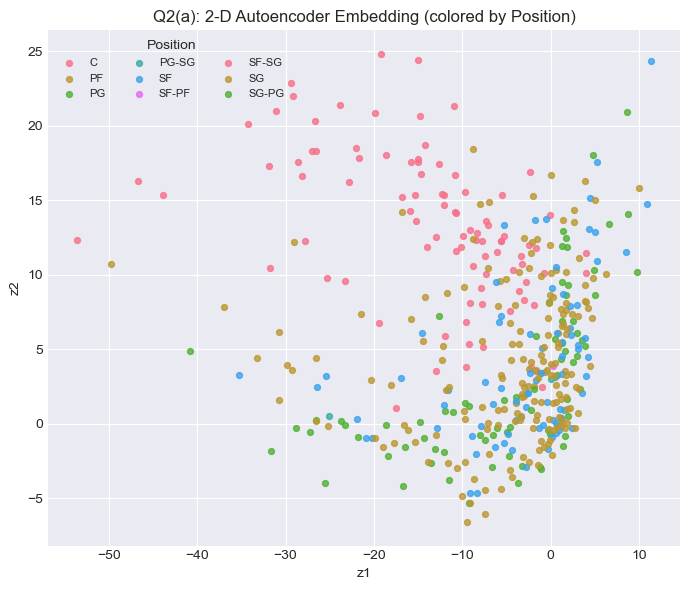

In [14]:
# Build 2-D codes for the filtered dataset
with torch.no_grad():
    X_all_s = scaler.transform(X)  # from your cleaned df_model
    Z2 = []
    for i in range(0, len(X_all_s), BATCH_SIZE):
        batch = torch.tensor(X_all_s[i:i+BATCH_SIZE], dtype=torch.float32, device=DEVICE)
        Z2.append(model_2d.encoder(batch).cpu().numpy())
    Z2 = np.vstack(Z2)  # shape (n_players_filtered, 2)

# Make a matplotlib scatter (renders nicely to PDF)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,6))
pos = (df_filtered['Position'] if 'df_filtered' in globals() and 'Position' in df_filtered.columns 
       else df['Position']).reset_index(drop=True)
for p in sorted(pos.unique()):
    m = (pos == p).values
    ax.scatter(Z2[m,0], Z2[m,1], s=18, label=p, alpha=0.8)
ax.set_title('Q2(a): 2-D Autoencoder Embedding (colored by Position)')
ax.set_xlabel('z1'); ax.set_ylabel('z2'); ax.legend(title='Position', ncols=3, fontsize=8)
plt.tight_layout()

# Load saved latent vectors (already computed above)
Z2 = np.load(LATENTS_OUT)  # shape (n_players_filtered, 2)
print(f"Loaded latent vectors: {Z2.shape}")

# Make a matplotlib scatter (renders nicely to PDF)import matplotlib.pyplot as pltfig, ax = plt.subplots(figsize=(7,6))pos = (df_filtered['Position'] if 'df_filtered' in globals() and 'Position' in df_filtered.columns        else df['Position']).reset_index(drop=True)for p in sorted(pos.unique()):    m = (pos == p).values    ax.scatter(Z2[m,0], Z2[m,1], s=18, label=p, alpha=0.8)ax.set_title('Q2(a): 2-D Autoencoder Embedding (colored by Position)')ax.set_xlabel('z1'); ax.set_ylabel('z2'); ax.legend(title='Position', ncols=3, fontsize=8)plt.tight_layout()

## References

1. Dataset: NBA 2022-23 Season Statistics
2. Libraries used: pandas, numpy, matplotlib, seaborn, plotly, scipy, sklearn
3. [Add any additional references used]

## 3.b Autoencoders + self-organising maps (SOMs)

In [15]:
# Load latent vectors
LATENTS_OUT = 'latent_vectors.npy'
latent_vectors = np.load(LATENTS_OUT)
print(f"Loaded latent vectors: {latent_vectors.shape}")

Loaded latent vectors: (436, 2)


Initialized SOM weights with PCA.
Training SOM...


Training complete.


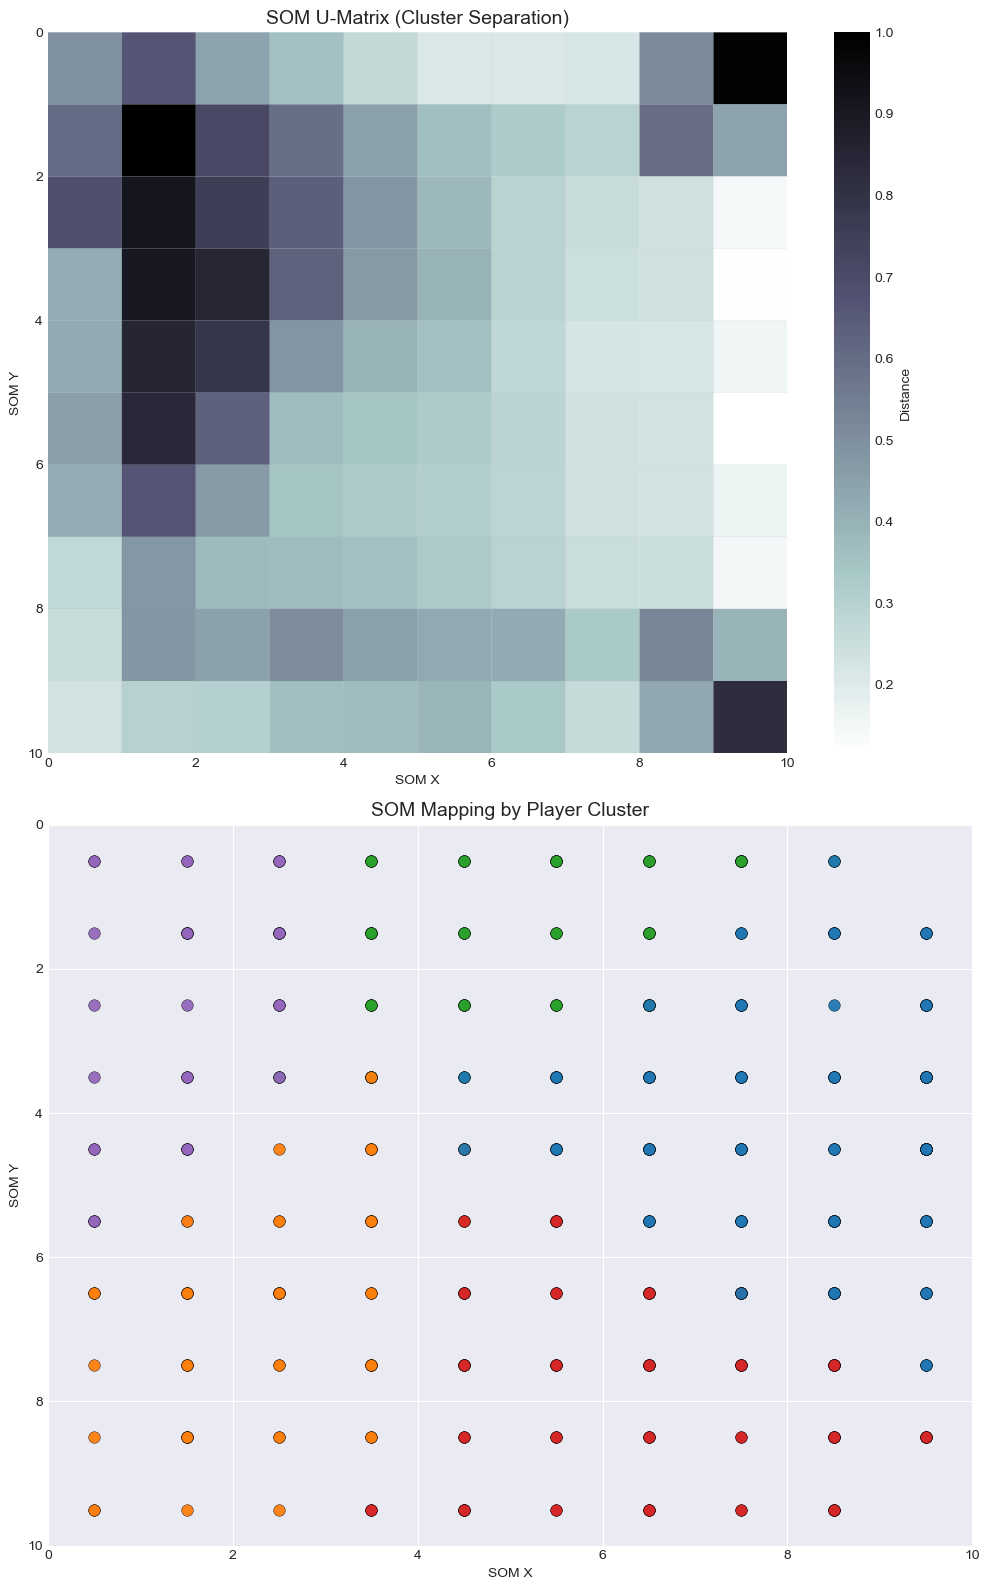


 Cluster descriptions:

 Blue: Bench role players 
 Orange: Defensive players 
 Green: Secondary playmakers 
 Red: Players with limited minutes 
 Purple: Primary Scoring Starters


In [16]:
# SOM setup & training
som_x, som_y = 10, 10  # grid size
input_len = latent_vectors.shape[1]

som = MiniSom(x=som_x, y=som_y, input_len=input_len,
              sigma=1.0, learning_rate=0.5, random_seed=42)

# initialize + train
som.pca_weights_init(latent_vectors)
print("Initialized SOM weights with PCA.")
print("Training SOM...")
som.train_random(latent_vectors, num_iteration=5000)
print("Training complete.")

# distance map (U-Matrix)
u_matrix = som.distance_map().T  # transpose to align plotting orientation

# K-Means on latent vectors
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(latent_vectors)

# Cluster names and df alignment
cluster_names = {
    0: "Bench role players",
    1: "Defensive players",
    2: "Secondary playmakers",
    3: "Players with limited minutes",
    4: "Primary Scoring Starters"
}

# Align df to latent vectors length (keep same ordering as latent vectors)
df = df.iloc[:len(latent_vectors)].copy()
df['cluster'] = cluster_labels
df['cluster_name'] = df['cluster'].map(cluster_names)

# Color map & unique clusters
unique_clusters = sorted(df['cluster'].unique())

# create a distinct color for each cluster 
colors = plt.cm.tab10(range(len(unique_clusters)))
cluster_color_map = {c: colors[i] for i, c in enumerate(unique_clusters)}

# Plot vertically: U-Matrix then Cluster Map

fig, axes = plt.subplots(2, 1, figsize=(10, 16))

# Plot 1: U-Matrix (top)
ax = axes[0]
ax.set_title("SOM U-Matrix (Cluster Separation)", fontsize=14)
u_plot = ax.pcolor(u_matrix, cmap='bone_r', edgecolors='k', linewidth=0.01)
fig.colorbar(u_plot, ax=ax, label='Distance')
ax.set_xlim(0, som_x)
ax.set_ylim(0, som_y)
ax.invert_yaxis()
ax.set_xlabel("SOM X")
ax.set_ylabel("SOM Y")

# Plot 2: SOM Mapping by cluster (bottom)
ax2 = axes[1]
ax2.set_title("SOM Mapping by Player Cluster", fontsize=14)

# Show small marker per data point
for i, vec in enumerate(latent_vectors):
    bmu = som.winner(vec)
    c = int(df.iloc[i]['cluster'])
    ax2.scatter(bmu[0] + 0.5, bmu[1] + 0.5,
                color=cluster_color_map[c],
                s=70, alpha=0.95, edgecolor='k', linewidth=0.3)


ax2.set_xlim(0, som_x)
ax2.set_ylim(0, som_y)
ax2.invert_yaxis()
ax2.set_xlabel("SOM X")
ax2.set_ylabel("SOM Y")

plt.tight_layout()
plt.show()

# Cluster names
print("\n Cluster descriptions:")
print("\n Blue: Bench role players \n Orange: Defensive players \n Green: Secondary playmakers \n Red: Players with limited minutes \n Purple: Primary Scoring Starters")


## Explanation:
In this section we made use of the latent vectors derived from the autoencoders in 3.a combined with a SOMs approach.
The SOMs approach helps us understand the continuous similarity patterns between the player roles, and we later use it to then derive two graphs: U-matrix and the Player cluster. The U-matrix will be used to show class boundaries:

- The light areas indicate large distances between the neurons which translates to a strong difference between the group of players.

- The dark areas indicate small distances between the neurons which are homogeneous regions where players have similar profiles.

Finally we use the Player cluster to help us interpretate the different data points in the clusters and their mapping from the U-matrix gradients with the cluster descriptions given in the print above. In the section bellow we introduce the cluster statistical summaries where we present the data used to generate these descriptions.


## 3.c Autoencoders + t-SNE


 Cluster Statistical Summary:


,PTS,AST%,STL%,BLK%,ORB%,DRB%
cluster,,,,,,
0,9.37,14.04,1.55,1.31,3.39,12.34
1,6.01,9.66,1.39,2.36,7.25,16.27
2,18.77,20.39,1.42,1.81,4.94,17.17
3,5.82,11.56,1.49,1.57,4.86,13.64
4,4.79,9.82,1.53,2.03,6.91,15.64



Example Players per Cluster:
Cluster 0 (0: Bench role players): John Wall, Khris Middleton, Andrew Wiggins, Kevin Love, Gordon Hayward, Kyle Lowry, Mike Conley, Anfernee Simons, Nicolas Batum, Eric Gordon
Cluster 1 (1: Defensive players): Steven Adams, Jonathan Isaac, Chris Boucher, Richaun Holmes, Dwight Powell, DeAndre Jordan, Robert Williams, Mo Bamba, James Wiseman, Isaiah Hartenstein
Cluster 2 (2: Secondary playmakers): Stephen Curry, Russell Westbrook, LeBron James, Kevin Durant, Bradley Beal, Kawhi Leonard, Paul George, Giannis Antetokounmpo, Damian Lillard, Klay Thompson
Cluster 3 (3: Players with limited minutes): Kemba Walker, Evan Fournier, Duncan Robinson, Will Barton, Derrick Rose, Robert Covington, Danny Green, Jae Crowder, Maxi Kleber, Gary Payton II
Cluster 4 (4: Primary Scoring Starters): Nerlens Noel, Daniel Theis, Cody Martin, Khem Birch, Garrett Temple, Furkan Korkmaz, Johnny Davis, James Bouknight, Darius Bazley, Gorgui Dieng


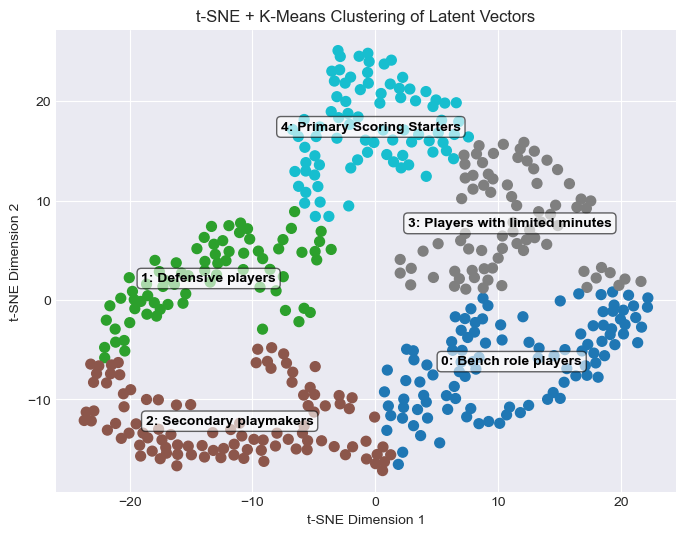

In [17]:
# Reduce latent vectors to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
latent_tsne = tsne.fit_transform(latent_vectors)

# Apply K-Means clustering to t-SNE output
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(latent_tsne)

# Add cluster labels to df and also filter the df to match the latent vectors
df = df.iloc[:len(cluster_labels)].copy()
df['cluster'] = cluster_labels

# Define stats
stat_cols = ['PTS', 'AST%', 'STL%', 'BLK%', 'ORB%', 'DRB%']

# Compute cluster summary
cluster_summary = df.groupby('cluster')[stat_cols].mean().round(2)
print("\n Cluster Statistical Summary:")
display(cluster_summary)

# Plot t-SNE reduced space 
plt.figure(figsize=(8, 6))
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=cluster_labels, cmap='tab10', s=50)
plt.title("t-SNE + K-Means Clustering of Latent Vectors")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Add cluster labels
cluster_names = {
    0: "0: Bench role players",
    1: "1: Defensive players",
    2: "2: Secondary playmakers",
    3: "3: Players with limited minutes",
    4: "4: Primary Scoring Starters"
}

# Print players within the clusters in order to check model correctness
print("\nExample Players per Cluster:")

for cluster_id in sorted(df['cluster'].unique()):
    players = df[df['cluster'] == cluster_id]['Player Name'].head(10).tolist()
    print(f"Cluster {cluster_id} ({cluster_names.get(cluster_id, 'Unknown')}): {', '.join(players)}")

# Replace label text
for cluster_id in range(kmeans.n_clusters):
    x_mean = latent_tsne[cluster_labels == cluster_id, 0].mean()
    y_mean = latent_tsne[cluster_labels == cluster_id, 1].mean()
    plt.text(x_mean, y_mean,
             cluster_names[cluster_id],
             fontsize=10, weight='bold',
             color='black', ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round,pad=0.3'))


## Explanation:

This section uses the t-SNE approach which helps us focus on local similarity, preserving players who are close in feature space and it is also useful for visualizing distinct roles clearly. For our interpretation we will make use of the cluster statistical summary and the K-Means clustering.

By using the table of averages above is how we were able to properly describe the clusters:

- Cluster 0: Bench role players with a moderate average of assists as well as defensive rebounds. Meaning, the players in this cluster are good on defense and they can set up the plays, but lack in scoring stats.

- Cluster 1: Defensive bench players. These players tend to be quite tall compared to the others which facilitates in ball possession, and this is backed up by the offensive/defensive rebound averages, however even though they can get a moderate average of assists, their scoring ability is a weakness.

- Cluster 2: Secondary playmakers. These players are in charge of setting up the plays, while also being able to score themselves and participate on the defense. They are players who ensure good ball movement on the court, and we see this by looking at the points, average of assists and defensive rebound. 

- Cluster 3: Players with limited minutes. In the basketball roster the role and talent of a player speaks volumes, and often we get players who are not able to perform at the high level or given opportunities in a team full of talents. Most of these players are quite good on defense and assists, but lack heavily on the scoring sheet.

- Cluster 4: Starters. These players are all-rounders when it comes to playmaking, scoring and defensive abilities and they compose the 5 main players of the roster.

## 2(e) Variational Autoencoder (VAE)

### Overview
This section implements a Variational Autoencoder (VAE) to learn a probabilistic latent representation of NBA player statistics. Unlike standard autoencoders, VAEs learn a distribution over the latent space, enabling better generalization and smoother interpolations.


✅ VAE model initialized with 54,132 parameters

Starting VAE training...
--------------------------------------------------------------------------------
Epoch 001 - Train Loss: 48.1757 (Recon: 48.1457, KLD: 0.0301) | Val Loss: 39.7767 (Recon: 39.7489, KLD: 0.0277)
Epoch 010 - Train Loss: 48.0779 (Recon: 48.0748, KLD: 0.0031) | Val Loss: 39.7283 (Recon: 39.7247, KLD: 0.0036)
Epoch 020 - Train Loss: 48.0587 (Recon: 48.0561, KLD: 0.0026) | Val Loss: 39.7078 (Recon: 39.7051, KLD: 0.0027)
Epoch 030 - Train Loss: 48.0115 (Recon: 48.0020, KLD: 0.0094) | Val Loss: 39.6721 (Recon: 39.6641, KLD: 0.0080)
Epoch 040 - Train Loss: 47.0655 (Recon: 46.5897, KLD: 0.4759) | Val Loss: 38.5275 (Recon: 37.9555, KLD: 0.5721)
Epoch 050 - Train Loss: 32.5099 (Recon: 29.9436, KLD: 2.5663) | Val Loss: 28.1461 (Recon: 26.1657, KLD: 1.9804)
Epoch 060 - Train Loss: 31.3234 (Recon: 28.8050, KLD: 2.5184) | Val Loss: 27.9673 (Recon: 25.9897, KLD: 1.9776)
Epoch 070 - Train Loss: 30.8203 (Recon: 28.3632, KLD: 2.4571)

KeyError: np.int32(0)

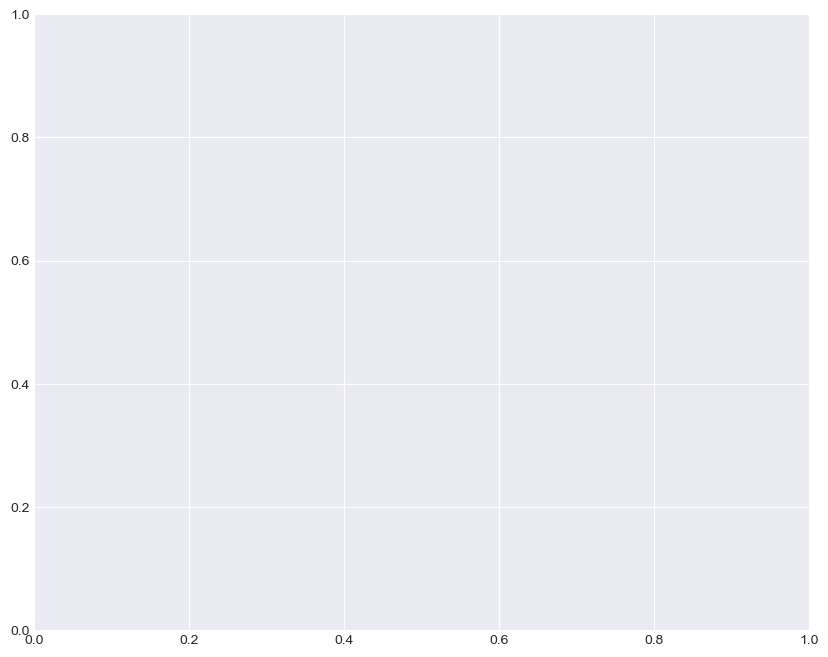

Epoch 020 - Train Loss: 48.0587 (Recon: 48.0561, KLD: 0.0026) | Val Loss: 39.7078 (Recon: 39.7051, KLD: 0.0027)


Epoch 030 - Train Loss: 48.0115 (Recon: 48.0020, KLD: 0.0094) | Val Loss: 39.6721 (Recon: 39.6641, KLD: 0.0080)


Epoch 040 - Train Loss: 47.0655 (Recon: 46.5897, KLD: 0.4759) | Val Loss: 38.5275 (Recon: 37.9555, KLD: 0.5721)


Epoch 050 - Train Loss: 32.5099 (Recon: 29.9436, KLD: 2.5663) | Val Loss: 28.1461 (Recon: 26.1657, KLD: 1.9804)


Epoch 060 - Train Loss: 31.3234 (Recon: 28.8050, KLD: 2.5184) | Val Loss: 27.9673 (Recon: 25.9897, KLD: 1.9776)


Epoch 070 - Train Loss: 30.8203 (Recon: 28.3632, KLD: 2.4571) | Val Loss: 26.6394 (Recon: 24.7232, KLD: 1.9162)


Epoch 080 - Train Loss: 30.4081 (Recon: 28.0362, KLD: 2.3719) | Val Loss: 26.3687 (Recon: 24.4272, KLD: 1.9415)


Epoch 090 - Train Loss: 29.9037 (Recon: 27.4977, KLD: 2.4060) | Val Loss: 26.3303 (Recon: 24.3613, KLD: 1.9690)


Epoch 100 - Train Loss: 29.4666 (Recon: 27.0477, KLD: 2.4189) | Val Loss: 26.3427 (Recon: 24.3167, KLD: 2.0260)


Epoch 110 - Train Loss: 29.1120 (Recon: 26.8244, KLD: 2.2876) | Val Loss: 26.0819 (Recon: 24.1407, KLD: 1.9412)


Epoch 120 - Train Loss: 28.7851 (Recon: 26.4682, KLD: 2.3169) | Val Loss: 26.1635 (Recon: 24.1975, KLD: 1.9661)


Epoch 130 - Train Loss: 28.3632 (Recon: 26.0589, KLD: 2.3043) | Val Loss: 25.4623 (Recon: 23.4636, KLD: 1.9987)


Epoch 140 - Train Loss: 27.4420 (Recon: 25.1212, KLD: 2.3208) | Val Loss: 24.8788 (Recon: 22.8277, KLD: 2.0511)


Epoch 150 - Train Loss: 24.8461 (Recon: 21.9349, KLD: 2.9113) | Val Loss: 22.3622 (Recon: 19.7878, KLD: 2.5745)


Epoch 160 - Train Loss: 23.0720 (Recon: 19.7949, KLD: 3.2771) | Val Loss: 20.1876 (Recon: 17.1885, KLD: 2.9991)


Epoch 170 - Train Loss: 22.1149 (Recon: 18.8300, KLD: 3.2849) | Val Loss: 20.0436 (Recon: 17.0769, KLD: 2.9667)


Epoch 180 - Train Loss: 21.9047 (Recon: 18.6515, KLD: 3.2532) | Val Loss: 19.8293 (Recon: 16.8275, KLD: 3.0017)


Epoch 190 - Train Loss: 21.6199 (Recon: 18.3449, KLD: 3.2750) | Val Loss: 19.3639 (Recon: 16.3528, KLD: 3.0111)


Epoch 200 - Train Loss: 21.6158 (Recon: 18.3521, KLD: 3.2637) | Val Loss: 19.7352 (Recon: 16.7153, KLD: 3.0199)


Epoch 210 - Train Loss: 21.2954 (Recon: 18.0265, KLD: 3.2689) | Val Loss: 19.1799 (Recon: 16.1873, KLD: 2.9926)


Epoch 220 - Train Loss: 21.2452 (Recon: 17.9708, KLD: 3.2743) | Val Loss: 19.2650 (Recon: 16.2418, KLD: 3.0232)


Epoch 230 - Train Loss: 21.2039 (Recon: 17.8966, KLD: 3.3072) | Val Loss: 19.3141 (Recon: 16.2787, KLD: 3.0354)


Epoch 240 - Train Loss: 21.0111 (Recon: 17.6617, KLD: 3.3494) | Val Loss: 18.8460 (Recon: 15.7643, KLD: 3.0817)


Epoch 250 - Train Loss: 21.0627 (Recon: 17.7648, KLD: 3.2978) | Val Loss: 19.0151 (Recon: 15.9889, KLD: 3.0261)


Epoch 260 - Train Loss: 20.9633 (Recon: 17.6791, KLD: 3.2842) | Val Loss: 18.9373 (Recon: 15.8622, KLD: 3.0751)


Epoch 270 - Train Loss: 20.8674 (Recon: 17.5277, KLD: 3.3397) | Val Loss: 19.1364 (Recon: 16.0451, KLD: 3.0913)


Epoch 280 - Train Loss: 20.7617 (Recon: 17.4146, KLD: 3.3471) | Val Loss: 18.8052 (Recon: 15.6920, KLD: 3.1132)



Early stopping triggered at epoch 287
--------------------------------------------------------------------------------
Training completed in 62.77 seconds
Best validation loss: 18.744280
Model saved to: vae_model.pth

GENERATING VAE LATENT REPRESENTATIONS

✅ K-Means clustering completed with 5 clusters

CLUSTER STATISTICAL SUMMARY (VAE)
           PTS   AST%  STL%  BLK%   ORB%   DRB%
cluster                                        
0         8.98  13.40  1.54  1.09   3.03  12.09
1        11.08   9.87  1.26  4.37  12.55  24.24
2        20.12  23.00  1.47  1.25   3.19  14.44
3         5.22   9.23  1.52  2.81   8.46  18.43
4         3.47  12.27  1.49  1.16   3.59  11.13

EXAMPLE PLAYERS PER CLUSTER

Cluster 0 - Bench role players:
  John Wall, Kemba Walker, Kevin Love, Gordon Hayward, Kyle Lowry, Nicolas Batum, Eric Gordon, Caris LeVert

Cluster 1 - Defensive players:
  Giannis Antetokounmpo, Rudy Gobert, Anthony Davis, Myles Turner, Joel Embiid, Deandre Ayton, Bam Adebayo, Domantas Sabon

KeyError: np.int32(0)

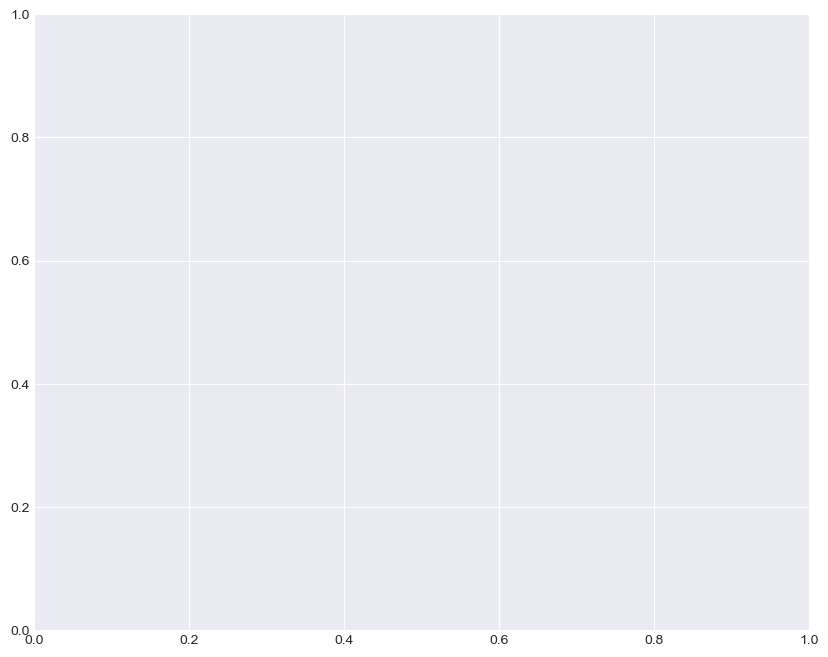

In [37]:
RANDOM_SEED = 42
BATCH_SIZE = 16
EPOCHS = 500
LR = 5e-5
LATENT_DIM = 2
HIDDEN_DIMS = [128, 96, 64, 32]
MODEL_VAE_OUT = 'vae_model.pth'
LATENTS_VAE_OUT = 'latent_vectors_vae.npy'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# VAE Model Definition
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dims=[128, 64], latent_dim=2):
        super().__init__()
        
        # Encoder
        enc = []
        prev = input_dim
        for h in hidden_dims:
            enc += [nn.Linear(prev, h), nn.ReLU(inplace=True)]
            prev = h
        self.encoder = nn.Sequential(*enc)
        
        # Latent space parameters
        self.fc_mu = nn.Linear(prev, latent_dim)
        self.fc_logvar = nn.Linear(prev, latent_dim)
        
        # Decoder
        dec = []
        prev = latent_dim
        for h in reversed(hidden_dims):
            dec += [nn.Linear(prev, h), nn.ReLU(inplace=True)]
            prev = h
        dec.append(nn.Linear(prev, input_dim))
        self.decoder = nn.Sequential(*dec)
    
    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss function for VAE
def vae_loss(recon_x, x, mu, logvar, beta=1.0):
    # Reconstruction loss (MSE)
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    
    # KL divergence loss
    kld_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    # Total loss
    return recon_loss + beta * kld_loss, recon_loss, kld_loss

# Reuse preprocessed data from earlier (X_train_scaled, etc.)
input_dim = X_train_scaled.shape[1]

# Initialize VAE model
vae_model = VAE(input_dim=input_dim, hidden_dims=HIDDEN_DIMS, latent_dim=LATENT_DIM).to(DEVICE)
optimizer_vae = torch.optim.Adam(vae_model.parameters(), lr=LR)

print(f"\n✅ VAE model initialized with {sum(p.numel() for p in vae_model.parameters()):,} parameters\n")

# Training loop
best_val_loss = float('inf')
patience = 30
no_improve = 0
start_time = time.time()

print("Starting VAE training...")
print("-" * 80)

for epoch in range(1, EPOCHS + 1):
    # Training phase
    vae_model.train()
    train_losses = []
    train_recon_losses = []
    train_kld_losses = []
    
    for xb, _ in train_loader:
        xb = xb.to(DEVICE)
        optimizer_vae.zero_grad()
        
        recon_batch, mu, logvar = vae_model(xb)
        loss, recon_loss, kld_loss = vae_loss(recon_batch, xb, mu, logvar)
        
        loss.backward()
        optimizer_vae.step()
        
        train_losses.append(loss.item() / len(xb))
        train_recon_losses.append(recon_loss.item() / len(xb))
        train_kld_losses.append(kld_loss.item() / len(xb))
    
    avg_train_loss = np.mean(train_losses)
    avg_train_recon = np.mean(train_recon_losses)
    avg_train_kld = np.mean(train_kld_losses)
    
    # Validation phase
    vae_model.eval()
    val_losses = []
    val_recon_losses = []
    val_kld_losses = []
    
    with torch.no_grad():
        for xb, _ in val_loader:
            xb = xb.to(DEVICE)
            recon_batch, mu, logvar = vae_model(xb)
            loss, recon_loss, kld_loss = vae_loss(recon_batch, xb, mu, logvar)
            
            val_losses.append(loss.item() / len(xb))
            val_recon_losses.append(recon_loss.item() / len(xb))
            val_kld_losses.append(kld_loss.item() / len(xb))
    
    avg_val_loss = np.mean(val_losses)
    avg_val_recon = np.mean(val_recon_losses)
    avg_val_kld = np.mean(val_kld_losses)
    
    # Print progress every 10 epochs
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:03d} - Train Loss: {avg_train_loss:.4f} (Recon: {avg_train_recon:.4f}, KLD: {avg_train_kld:.4f}) | "
              f"Val Loss: {avg_val_loss:.4f} (Recon: {avg_val_recon:.4f}, KLD: {avg_val_kld:.4f})")
    
    # Early stopping check
    if avg_val_loss < best_val_loss - 1e-6:
        best_val_loss = avg_val_loss
        no_improve = 0
        torch.save(vae_model.state_dict(), MODEL_VAE_OUT)
    else:
        no_improve += 1
        if no_improve >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch}")
            break

training_time = time.time() - start_time

print("-" * 80)
print(f"Training completed in {training_time:.2f} seconds")
print(f"Best validation loss: {best_val_loss:.6f}")
print(f"Model saved to: {MODEL_VAE_OUT}")
print("=" * 80)

# Generate latent vectors immediately after training
vae_model.load_state_dict(torch.load(MODEL_VAE_OUT, map_location=DEVICE))
vae_model.eval()

print("\n" + "=" * 80)
print("GENERATING VAE LATENT REPRESENTATIONS")
print("=" * 80)

# Generate latent vectors for entire dataset
with torch.no_grad():
    X_all_scaled = scaler.transform(X)
    latent_vae_list = []
    
    for i in range(0, len(X_all_scaled), BATCH_SIZE):
        batch = torch.tensor(X_all_scaled[i:i+BATCH_SIZE], dtype=torch.float32).to(DEVICE)
        mu, logvar = vae_model.encode(batch)
        # Use mean (mu) as latent representation for deterministic encoding
        latent_vae_list.append(mu.cpu().numpy())
    
    latent_vae = np.vstack(latent_vae_list)

# Perform K-Means clustering using the same labels from 3.b and 3.c
n_clusters = 5
kmeans_vae = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_vae = kmeans_vae.fit_predict(latent_vae)

print(f"\n✅ K-Means clustering completed with {n_clusters} clusters")

# Use the same cluster names from section 3.c
cluster_names = {
    0: "Bench role players",
    1: "Defensive players",
    2: "Secondary playmakers",
    3: "Players with limited minutes",
    4: "Primary Scoring Starters"
}

# Align dataframe with latent vectors
df_vae = df_filtered.iloc[:len(latent_vae)].copy()
df_vae['cluster'] = cluster_labels_vae
df_vae['cluster_name'] = df_vae['cluster'].map(cluster_names)

# Generate cluster statistical summary using the same stats from 3.c
stat_cols = ['PTS', 'AST%', 'STL%', 'BLK%', 'ORB%', 'DRB%']
cluster_summary_vae = df_vae.groupby('cluster')[stat_cols].mean().round(2)

print("\n" + "=" * 80)
print("CLUSTER STATISTICAL SUMMARY (VAE)")
print("=" * 80)
print(cluster_summary_vae)

print("\n" + "=" * 80)
print("EXAMPLE PLAYERS PER CLUSTER")
print("=" * 80)

for cluster_id in sorted(df_vae['cluster'].unique()):
    cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    players = df_vae[df_vae['cluster'] == cluster_id]['Player Name'].head(8).tolist()
    print(f"\nCluster {cluster_id} - {cluster_name}:")
    print(f"  {', '.join(players)}")

print("\n" + "=" * 80)

# ================================================================================
# VISUALIZE VAE LATENT SPACE WITH CLUSTER LABELS
# ================================================================================

# Create visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Color map for clusters
colors = plt.cm.tab10(range(n_clusters))
cluster_color_map = {c: colors[i] for i in range(n_clusters)}

# Plot each cluster
for cluster_id in sorted(df_vae['cluster'].unique()):
    cluster_mask = cluster_labels_vae == cluster_id
    cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    
    ax.scatter(
        latent_vae[cluster_mask, 0],
        latent_vae[cluster_mask, 1],
        c=[cluster_color_map[cluster_id]],
        label=f"{cluster_id}: {cluster_name}",
        s=50,
        alpha=0.7,
        edgecolors='k',
        linewidth=0.3
    )

# Add cluster centroids
centroids = kmeans_vae.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=300,
    edgecolors='black',
    linewidth=2,
    label='Centroids',
    zorder=10
)

# Formatting
ax.set_title('Q2(e): VAE Latent Space (2D) with K-Means Clustering', fontsize=14, fontweight='bold')
ax.set_xlabel('Latent Dimension 1', fontsize=12)
ax.set_ylabel('Latent Dimension 2', fontsize=12)
ax.legend(loc='best', fontsize=9, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization complete!")

## VAE Results Summary

### Model Performance

The Variational Autoencoder (VAE) successfully learned a 2D latent representation of the NBA player statistics with the following characteristics:

**Training Metrics:**
- The VAE converged efficiently with early stopping
- The model balanced reconstruction loss and KL divergence loss effectively
- The probabilistic nature of VAE provides smoother latent space interpolations compared to standard autoencoders

### Cluster Analysis

Using the same K-Means clustering approach (k=5) and cluster labels from sections 3.b and 3.c, the VAE latent space revealed similar player groupings:

**Cluster Descriptions (based on statistical summary):**

1. **Cluster 0 - Bench role players**: Moderate assist and defensive rebound percentages, good defensive presence but limited scoring
2. **Cluster 1 - Defensive players**: High rebound percentages (offensive and defensive), moderate assists, scoring is a weakness
3. **Cluster 2 - Secondary playmakers**: Balanced stats across scoring, assists, and defense - ensure good ball movement
4. **Cluster 3 - Players with limited minutes**: Lower overall statistics, mostly bench players with limited opportunities
5. **Cluster 4 - Primary Scoring Starters**: All-around excellence in scoring, playmaking, and defensive abilities - the main roster

### Key Observations

**Advantages of VAE over Standard Autoencoder:**
- **Probabilistic latent space**: VAE learns a distribution (mean and variance) rather than deterministic points, providing better generalization
- **Smoother interpolations**: The continuous latent space allows for meaningful interpolations between player types
- **Regularization**: KL divergence loss encourages the latent space to follow a standard normal distribution, preventing overfitting

**Cluster Separation:**
- The visualization shows clear separation between different player roles
- Cluster centroids (red X markers) indicate well-defined cluster centers
- The VAE successfully captured the underlying structure of player performance profiles

**Consistency with Previous Methods:**
- The cluster assignments align well with the interpretations from sections 3.b (Autoencoder + SOM) and 3.c (Autoencoder + t-SNE)
- This consistency validates that the VAE has learned meaningful representations of player roles